Get the path to the dataset from kaggle



In [5]:
import kagglehub

path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print(path)

/kaggle/input/mnist-in-csv


Use pandas to read the csv file you got


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [7]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This I can't do math on so I shall convert it to numpy array


In [8]:
data = np.array(data)
m,n = data.shape     #m is rows (number of examples), n is - number of pixels +1 the label
np.random.shuffle(data)       #shuffle the data before we do train test split

data_dev = data[0:1000].T    #transpose the matrix such that each column is each example, and thus the first row will basically become
                            #the labels row, and each row corresponds to a pixel now
Y_dev = data_dev[0]         #labels
X_dev = data_dev[1:n]       #all rows except first because first is the labels

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [9]:
print(data_train.shape)

(785, 59000)


In [29]:
def init_params():
  w1 = np.random.randn(10, len(data.T)-1) * 0.01 #10 nodes in first layer so 10 weights, column size is same as that of no. of pixels (no. of inputs)
  b1 = np.random.randn(10,1) * 0.01
  w2 = np.random.randn(10,10) * 0.01 #again 10 nodes, column size also 10 as input it receives is from 10 previous nodes
  b2 = np.random.randn(10,1) * 0.01

  return w1, b1, w2, b2

#def ReLU(n):
  #if n<=0:
    #return 0
  #return n
#the above only works for one number, we are working with an array of em

def ReLU(Z):
  return np.maximum(0,Z)

def softmax(Z):
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)  # stability
    exp_Z = np.exp(Z_shift)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def fwd_propagation(w1, b1, w2, b2, X):
  z1 = w1.dot(X) + b1
  a1 = ReLU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)


  return z1, a1, z2, a2

def relu_derivative(z):
  return (z>0).astype(float)

def backpropagation(w1,b1,w2,b2,a1,a2,X,Y):
  #loss = -np.sum(Y*np.log(a2) + (1-Y)*(np.log(1-a2)))
  dC_dz2 = a2 - Y
  dC_dw2 = np.dot(dC_dz2, a1.T)
  dC_db2 = dC_dz2

  dC_dz1 = np.dot(w2.T, dC_dz2) * relu_derivative(z1)
  dC_dw1 = np.dot(dC_dz1, X.T)
  dC_db1 = dC_dz1



  return dC_dw1, dC_db1, dC_dw2, dC_db2

def update(w1,b1,w2,b2,dC_dw1,dC_db1,dC_dw2,dC_db2,lr,m):
  dC_dw1 = dC_dw1/m
  dC_db1 = dC_db1/m
  dC_dw2 = dC_dw2/m
  dC_db2 = dC_db2/m

  w2 -= lr*dC_dw2
  b2 -= lr*dC_db2
  w1 -= lr*dC_dw1
  b1 -= lr*dC_db1

  return w1, b1, w2, b2

p, samples = data_train.shape
t = 1
w1, b1, w2, b2 = init_params()
epochs = 100

while t <= epochs:
  net_dC_dw1 = 0
  net_dC_db1 = 0
  net_dC_dw2 = 0
  net_dC_db2 = 0
  correct = 0
  for i in range(samples):

    X = X_train[:,i:i+1]
    Y = np.zeros((10,1))      #one hot coding Y
    Y[Y_train[i]] = 1


    z1, a1, z2, a2 = fwd_propagation(w1, b1, w2, b2, X)
    dC_dw1, dC_db1, dC_dw2, dC_db2 = backpropagation(w1, b1, w2, b2, a1, a2, X, Y)
    net_dC_dw1 += dC_dw1
    net_dC_db1 += dC_db1
    net_dC_dw2 += dC_dw2
    net_dC_db2 += dC_db2
    if i < 5:
      print("a2.T =", a2.T.round(2))

    predicted_idx = np.argmax(a2)
    #print(predicted_idx, np.argmax(Y))
    if Y[predicted_idx] == 1:
      correct += 1

  w1, b1, w2, b2 = update(w1,b1,w2,b2,net_dC_dw1,net_dC_db1,net_dC_dw2,net_dC_db2,0.001,samples)
  print("Epoch", t, "Accuracy", (correct/samples)*100)


  t+=1









a2.T = [[0.08 0.16 0.04 0.1  0.04 0.14 0.22 0.06 0.05 0.11]]
a2.T = [[0.15 0.18 0.05 0.13 0.05 0.15 0.09 0.06 0.08 0.07]]
a2.T = [[0.13 0.1  0.08 0.12 0.12 0.08 0.08 0.08 0.09 0.12]]
a2.T = [[0.18 0.12 0.06 0.11 0.1  0.08 0.07 0.07 0.1  0.11]]
a2.T = [[0.11 0.12 0.08 0.11 0.07 0.1  0.11 0.08 0.11 0.13]]
Epoch 1 Accuracy 10.513559322033899
a2.T = [[0.09 0.14 0.05 0.1  0.05 0.13 0.2  0.07 0.06 0.11]]
a2.T = [[0.15 0.15 0.06 0.13 0.06 0.13 0.08 0.07 0.09 0.07]]
a2.T = [[0.13 0.1  0.08 0.12 0.13 0.08 0.08 0.08 0.09 0.12]]
a2.T = [[0.18 0.12 0.06 0.1  0.1  0.08 0.07 0.08 0.09 0.11]]
a2.T = [[0.11 0.11 0.08 0.1  0.08 0.1  0.1  0.08 0.11 0.13]]
Epoch 2 Accuracy 14.50677966101695
a2.T = [[0.1  0.12 0.05 0.1  0.06 0.13 0.18 0.08 0.07 0.11]]
a2.T = [[0.15 0.13 0.07 0.13 0.07 0.12 0.08 0.08 0.09 0.08]]
a2.T = [[0.13 0.09 0.08 0.12 0.13 0.08 0.08 0.08 0.09 0.12]]
a2.T = [[0.19 0.11 0.06 0.1  0.1  0.08 0.07 0.08 0.09 0.11]]
a2.T = [[0.11 0.11 0.09 0.1  0.08 0.1  0.1  0.08 0.11 0.12]]
Epoch 3 Accura

In [30]:
def test(w1,b1,w2,b2,X_dev,Y_dev):
  passed = 0
  for i in range(len(X_dev[0])):
    X = X_dev[:,i:i+1]
    Y = np.zeros((10,1))
    Y[Y_dev[i]] = 1
    z1, a1, z2, a2 = fwd_propagation(w1, b1, w2, b2, X)
    predicted_idx = np.argmax(a2)
    #print("predicted", predicted_idx, "actual", Y_dev[i])
    if Y[predicted_idx] == 1:
      passed += 1
  print("Accuracy on test data", (passed/len(X_dev[0]))*100, "%")

test(w1,b1,w2,b2,X_dev,Y_dev)


Accuracy on test data 83.8 %


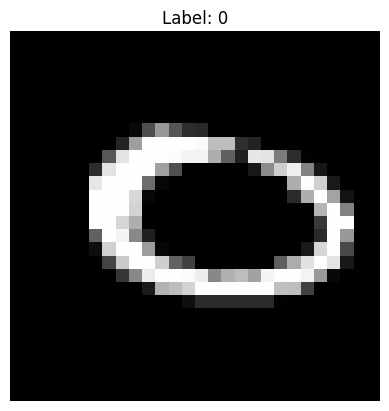

This is 0


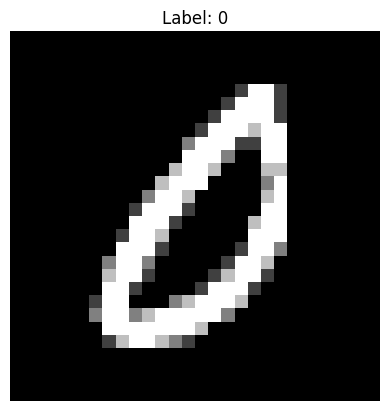

This is 0


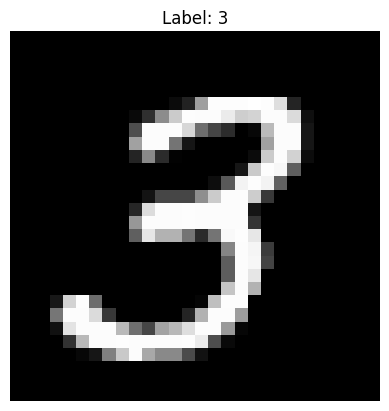

This is 3


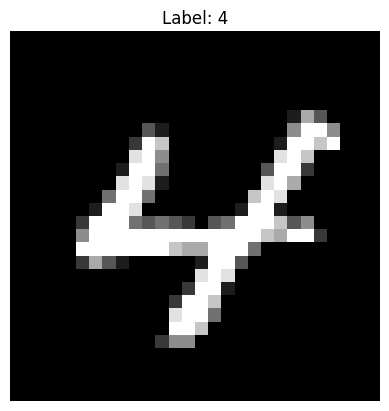

This is 4


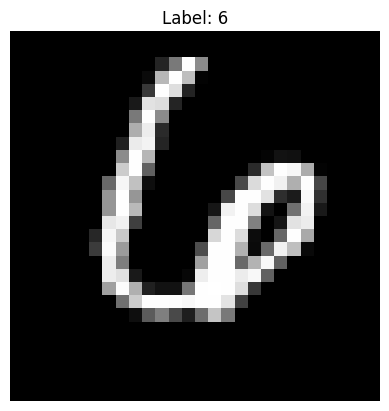

This is 6


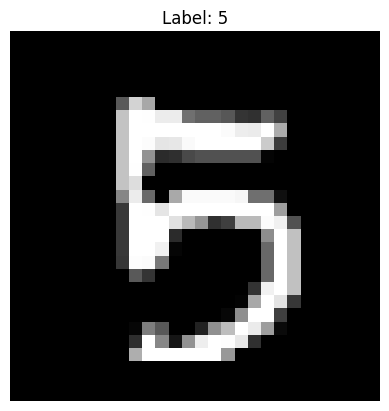

This is 5


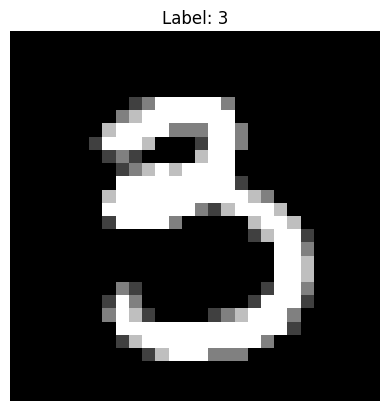

This is 3


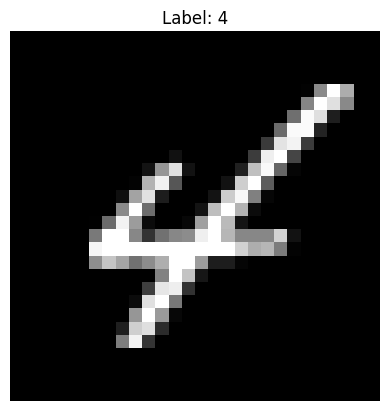

This is 4


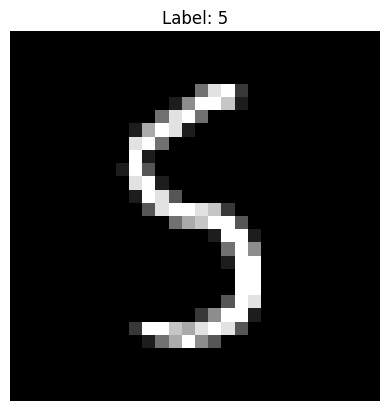

This is 5


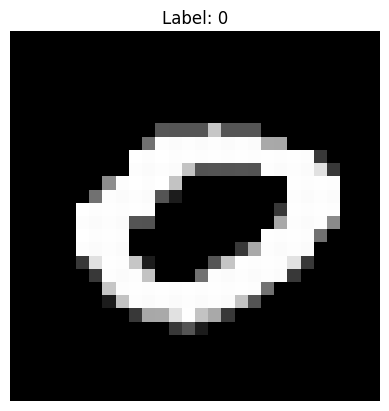

This is 0


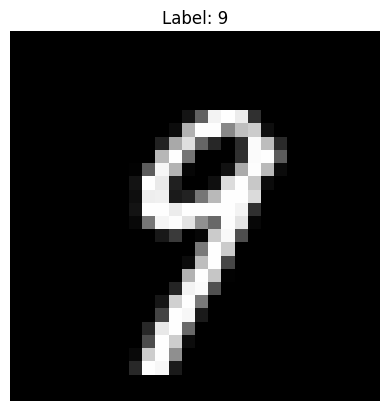

This is 9


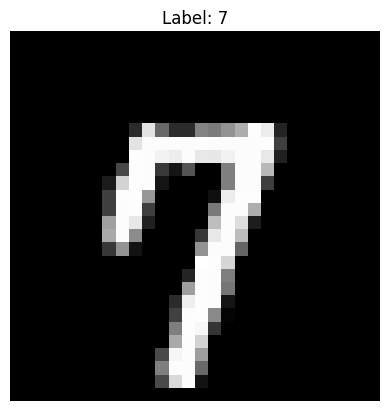

This is 7


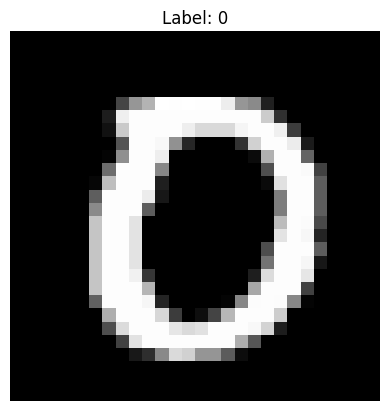

This is 0


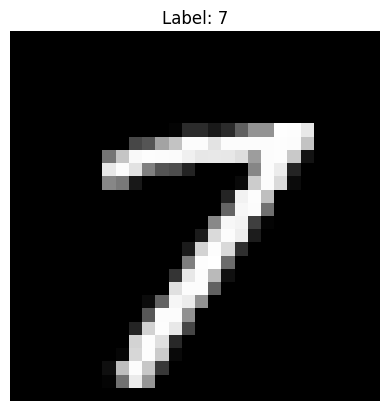

This is 7


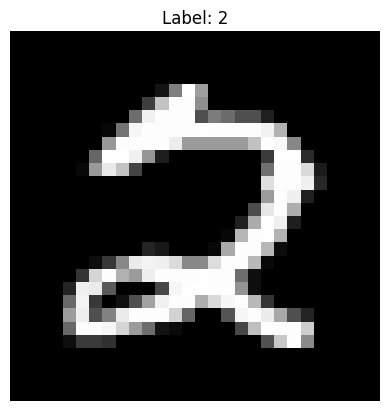

This is 2


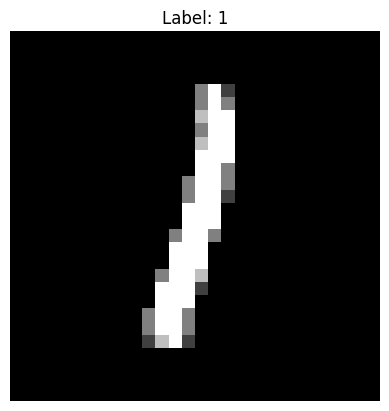

This is 1


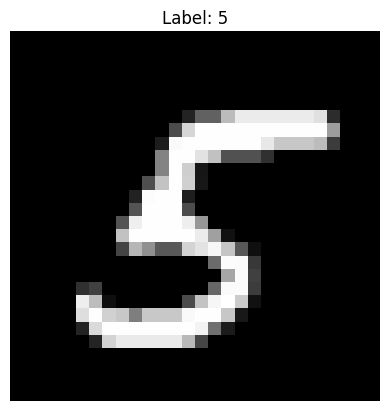

This is 5


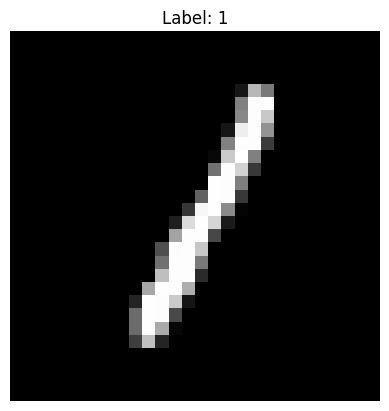

This is 1


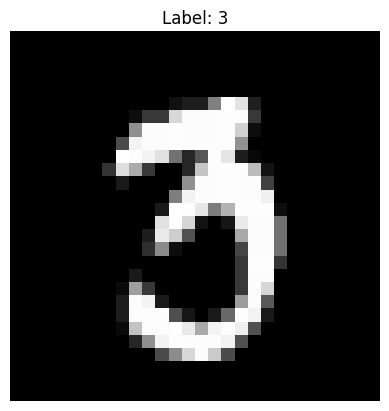

This is 3


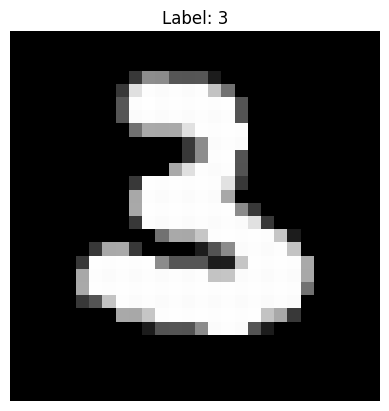

This is 2


In [31]:
for i in range(20):
  image = X_dev[:, i:i+1].reshape(28, 28)
  X = X_dev[:,i:i+1]
  plt.imshow(image, cmap="gray")
  plt.title(f"Label: {Y_dev[i]}")
  plt.axis("off")
  plt.show()
  z1, a1, z2, a2 = fwd_propagation(w1, b1, w2, b2, X)
  predicted_idx = np.argmax(a2)
  print("This is", predicted_idx)

